In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../") # go to parent dir

import numpy as np
import torch
import matplotlib.pyplot as plt
import mpmath
import networkx as nx

from metal.label_model import LabelModel
from metal.label_model.graph_utils import JunctionTree
from synthetic.generate_spa import (
    ChainDependencies,
    TreeDependencies,
    ClusterDependencies,
    DataGenerator
)
from metal.label_model.utils import (
    compute_mu,
    compute_covariance,
    compute_inv_covariance,
    print_matrix,
    visualize_matrix
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create the dependencies structure as a `DependenciesGraph`

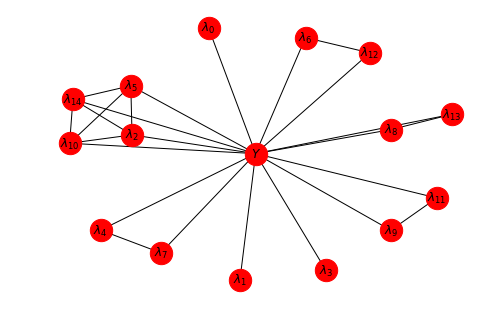

In [2]:
M = 15
N_CLUSTERS = 10
deps_graph = ClusterDependencies(M, N_CLUSTERS)
# deps_graph = ChainDependencies(M)
deps_graph.draw()

## Creat the `DataGenerator` and label matrix $L$

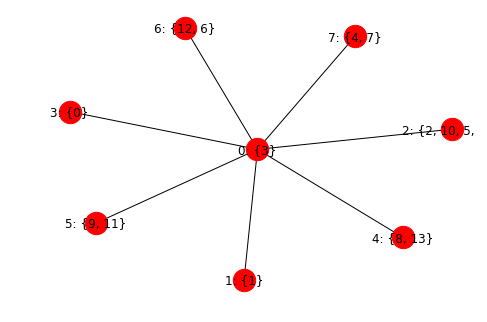

In [22]:
N = 1000000
K = 2
HIGHER_ORDER_CLIQUES = True

data = DataGenerator(
    N,
    M,
    k=K,
    abstains=False,
    deps_graph=deps_graph,
    higher_order_cliques=HIGHER_ORDER_CLIQUES
)
data.jt.draw()

In [23]:
%time L = data.generate_label_matrix(N)

CPU times: user 8min 47s, sys: 3.93 s, total: 8min 51s
Wall time: 8min 51s


### Train `LabelModel`

In [24]:
class_balance = data.get_class_balance()
class_balance

array([0.22081897, 0.77918103])

In [25]:
lm = LabelModel(k=2)

lm.train(
    L_train=L,
    class_balance=class_balance,
    junction_tree=data.jt,
    lr=0.01,
    n_epochs=10000,
    print_every=1000
)

Computing O^{-1}...
Estimating Z...
[E:0]	Train Loss: 264.91372681
[E:1000]	Train Loss: 0.02906271
[E:2000]	Train Loss: 0.02906271
[E:3000]	Train Loss: 0.02906271
[E:4000]	Train Loss: 0.02906271
[E:5000]	Train Loss: 0.02906271
[E:6000]	Train Loss: 0.02906271
[E:7000]	Train Loss: 0.02906271
[E:8000]	Train Loss: 0.02906271
[E:9000]	Train Loss: 0.02906271
[E:9999]	Train Loss: 0.02906271
Finished Training


In [26]:
mu_est = lm.get_mu(c=1)
mu = data.get_mu()
np.hstack([mu_est, mu])

array([[0.34409311, 0.3448763 ],
       [0.43925762, 0.43764855],
       [0.41627033, 0.41743736],
       [0.36381916, 0.36577873],
       [0.39035709, 0.39029635],
       [0.30995746, 0.31011645],
       [0.3916853 , 0.39046167],
       [0.30604686, 0.30557642],
       [0.38955423, 0.38696423],
       [0.31609059, 0.31717366],
       [0.33659332, 0.33770414],
       [0.48483156, 0.48422424],
       [0.50980692, 0.50913415],
       [0.27758821, 0.27594522],
       [0.55413643, 0.55431581],
       [0.04008733, 0.03979099],
       [0.14310738, 0.14230345],
       [0.19904083, 0.1993834 ],
       [0.2646752 , 0.26399934],
       [0.16758373, 0.16752338]])

In [27]:
np.mean(np.abs(mu - mu_est))

0.00087490187906816

In [28]:
sigma_OH_est = lm.get_sigma_OH(c=1)
sigma_OH = data.get_sigma_OH()
np.hstack([sigma_OH_est, sigma_OH])

array([[ 0.01574077,  0.01705411],
       [-0.01587835, -0.01780726],
       [-0.01280673, -0.01169891],
       [ 0.00950608,  0.01113222],
       [-0.01072632, -0.01028846],
       [ 0.01003276,  0.00975176],
       [-0.02252108, -0.02405808],
       [-0.0265006 , -0.02665306],
       [ 0.04655954,  0.04385496],
       [ 0.02253882,  0.02335623],
       [ 0.00214233,  0.00362439],
       [ 0.01498776,  0.01461019],
       [-0.00808354, -0.00876975],
       [ 0.0082378 ,  0.0067984 ],
       [ 0.01203368,  0.01232869],
       [ 0.00228147,  0.00218368],
       [ 0.01840646,  0.01752435],
       [ 0.01843212,  0.01854602],
       [-0.0201591 , -0.02105913],
       [-0.01942983, -0.01906297]])

In [29]:
np.mean(np.abs(sigma_OH_est - sigma_OH))

0.0009273732978094227